In [1]:
import csv
import random

import os
import pickle
import sys

import numpy as np
from tqdm import tqdm

import cv2

sys.path.append('../..')
from utils import plotting
from utils import image_manip

2025-07-23 12:54:23.183689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753289663.202647  715344 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753289663.208774  715344 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753289663.224866  715344 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753289663.224896  715344 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753289663.224898  715344 computation_placer.cc:177] computation placer alr

In [2]:
data_folder = '/mnt/c/Users/wanglab/Desktop/Mask+Jaw/'
output_folder = '/mnt/c/Users/wanglab/Desktop/Mask+Jaw/'

n_features = 2

new_resolution = (256,256)

validation_folders = []

random_seed_value = 4 # For reproducibility

train_split = 0.8

In [ ]:
from licking_data_parser import load_licking_data

training_images, training_image_filenames, training_labels = load_licking_data(
    data_folder,
    target_resolution=new_resolution,
    csv_delimiter=' ',  # Default delimiter, will auto-detect others
    csv_has_header=True,
    original_resolution=(480, 640),
    gaussian_sigma=(25, 25),
    load_all_images=True,  # This ensures missing labels are padded with zeros/NaN
    return_numpy=False  # Keep as lists for now to match existing code structure
)

Loading:   0%|          | 0/51 [00:00<?, ?it/s]

Loading experiment folder: 10_bottom
Found 29 images
Old resolution: (480, 640)


Loading:   2%|1         | 1/51 [00:00<00:45,  1.10it/s]

Loading experiment folder: 10_side
Found 38 images
Old resolution: (480, 640)


Loading:   4%|3         | 2/51 [00:02<00:55,  1.13s/it]

Loading experiment folder: 11_bottom
Found 20 images
Old resolution: (480, 640)


Loading:   6%|5         | 3/51 [00:02<00:43,  1.10it/s]

Loading experiment folder: 11_side
Found 46 images
Old resolution: (480, 640)


Loading:   8%|7         | 4/51 [00:04<00:52,  1.13s/it]

Loading experiment folder: 12_bottom
Found 21 images
Old resolution: (480, 640)


Loading:  10%|9         | 5/51 [00:04<00:44,  1.03it/s]

Loading experiment folder: 12_side
Found 57 images
Old resolution: (480, 640)


Loading:  12%|#1        | 6/51 [00:06<00:58,  1.29s/it]

Loading experiment folder: 13_bottom
Found 14 images


Loading:  14%|#3        | 7/51 [00:07<00:44,  1.02s/it]

Old resolution: (480, 640)
Loading experiment folder: 13_side
Found 66 images
Old resolution: (480, 640)


Loading:  16%|#5        | 8/51 [00:09<00:59,  1.39s/it]

Loading experiment folder: 14_bottom
Found 14 images


Loading:  18%|#7        | 9/51 [00:09<00:46,  1.10s/it]

Old resolution: (480, 640)
Loading experiment folder: 14_side
Found 30 images
Old resolution: (480, 640)


Loading:  20%|#9        | 10/51 [00:10<00:42,  1.03s/it]

Loading experiment folder: 15_bottom
Found 13 images


Loading:  22%|##1       | 11/51 [00:11<00:34,  1.18it/s]

Old resolution: (480, 640)
Loading experiment folder: 15_side
Found 24 images
Old resolution: (480, 640)


Loading:  24%|##3       | 12/51 [00:12<00:31,  1.24it/s]

Loading experiment folder: 16_bottom
Found 67 images
Old resolution: (480, 640)


Loading:  25%|##5       | 13/51 [00:13<00:43,  1.14s/it]

Loading experiment folder: 16_side
Found 55 images
Old resolution: (480, 640)


Loading:  27%|##7       | 14/51 [00:15<00:49,  1.35s/it]

Loading experiment folder: 17_bottom
Found 57 images


Loading:  29%|##9       | 15/51 [00:16<00:46,  1.30s/it]

Old resolution: (480, 640)
Skipping experiment folder: 17_bottom
Jaw coords: 51 vs 57 tongue labels
Loading experiment folder: 17_side
Found 101 images


Loading:  31%|###1      | 16/51 [00:19<00:55,  1.58s/it]

Old resolution: (480, 640)
Skipping experiment folder: 17_side
Jaw coords: 91 vs 101 tongue labels
Loading experiment folder: 18_bottom
Found 23 images
Old resolution: (480, 640)


Loading:  33%|###3      | 17/51 [00:19<00:45,  1.33s/it]

Loading experiment folder: 18_side
Found 39 images
Old resolution: (480, 640)


Loading:  35%|###5      | 18/51 [00:21<00:43,  1.33s/it]

Loading experiment folder: 19_bottom
Found 21 images
Old resolution: (480, 640)


Loading:  37%|###7      | 19/51 [00:21<00:36,  1.14s/it]

Loading experiment folder: 19_side
Found 72 images


Loading:  39%|###9      | 20/51 [00:23<00:38,  1.23s/it]

Old resolution: (480, 640)
Skipping experiment folder: 19_side
Jaw coords: 59 vs 72 tongue labels
Loading experiment folder: 1_bottom
Found 148 images
Old resolution: (480, 640)


Loading:  41%|####1     | 21/51 [00:28<01:08,  2.28s/it]

Loading experiment folder: 1_side
Found 141 images
Old resolution: (480, 640)


Loading:  43%|####3     | 22/51 [00:32<01:28,  3.05s/it]

Loading experiment folder: 20_bottom
Found 118 images
Old resolution: (480, 640)


Loading:  45%|####5     | 23/51 [00:36<01:27,  3.13s/it]

Loading experiment folder: 20_side
Found 131 images
Old resolution: (480, 640)


Loading:  47%|####7     | 24/51 [00:40<01:36,  3.56s/it]

Loading experiment folder: 21_side
Found 40 images
Old resolution: (480, 640)


Loading:  49%|####9     | 25/51 [00:41<01:13,  2.82s/it]

Loading experiment folder: 22_side
Found 34 images
Old resolution: (480, 640)


Loading:  51%|#####     | 26/51 [00:42<00:56,  2.26s/it]

Loading experiment folder: 23_side
Found 39 images
Old resolution: (480, 640)


Loading:  53%|#####2    | 27/51 [00:44<00:45,  1.92s/it]

Loading experiment folder: 24_side
Found 29 images
Old resolution: (480, 640)


Loading:  55%|#####4    | 28/51 [00:44<00:36,  1.57s/it]

Loading experiment folder: 25_side
Found 58 images
Old resolution: (480, 640)


Loading:  57%|#####6    | 29/51 [00:46<00:34,  1.59s/it]

Loading experiment folder: 26_side
Found 1001 images
Old resolution: (480, 640)


Loading:  59%|#####8    | 30/51 [01:14<03:19,  9.51s/it]

Loading experiment folder: 27_side
Found 68 images
Old resolution: (480, 640)


Loading:  61%|######    | 31/51 [01:16<02:24,  7.23s/it]

Loading experiment folder: 2_bottom
Found 60 images
Old resolution: (480, 640)


Loading:  63%|######2   | 32/51 [01:18<01:46,  5.59s/it]

Loading experiment folder: 2_side
Found 121 images
Old resolution: (480, 640)


Loading:  65%|######4   | 33/51 [01:21<01:29,  4.99s/it]

Loading experiment folder: 3_bottom
Found 78 images
Old resolution: (480, 640)


Loading:  67%|######6   | 34/51 [01:24<01:11,  4.20s/it]

Loading experiment folder: 3_side
Found 74 images
Old resolution: (480, 640)


Loading:  69%|######8   | 35/51 [01:26<00:57,  3.59s/it]

Loading experiment folder: 4_bottom
Found 108 images
Old resolution: (480, 640)


Loading:  71%|#######   | 36/51 [01:29<00:52,  3.47s/it]

Loading experiment folder: 4_side
Found 129 images
Old resolution: (480, 640)


Loading:  73%|#######2  | 37/51 [01:33<00:50,  3.64s/it]

Loading experiment folder: 5_bottom
Found 52 images
Old resolution: (480, 640)


Loading:  75%|#######4  | 38/51 [01:34<00:39,  3.01s/it]

Loading experiment folder: 5_side
Found 66 images
Old resolution: (480, 640)


Loading:  76%|#######6  | 39/51 [01:36<00:32,  2.68s/it]

Loading experiment folder: 6_bottom
Found 36 images
Old resolution: (480, 640)


Loading:  78%|#######8  | 40/51 [01:37<00:24,  2.20s/it]

Loading experiment folder: 6_side
Found 32 images
Old resolution: (480, 640)


Loading:  80%|########  | 41/51 [01:38<00:18,  1.82s/it]

Loading experiment folder: 7_bottom
Found 40 images
Old resolution: (480, 640)


Loading:  82%|########2 | 42/51 [01:40<00:14,  1.63s/it]

Loading experiment folder: 7_side
Found 46 images
Old resolution: (480, 640)


Loading:  84%|########4 | 43/51 [01:41<00:12,  1.55s/it]

Loading experiment folder: 8_bottom
Found 41 images
Old resolution: (480, 640)


Loading:  86%|########6 | 44/51 [01:42<00:10,  1.45s/it]

Loading experiment folder: 8_side
Found 36 images
Old resolution: (480, 640)


Loading:  88%|########8 | 45/51 [01:43<00:08,  1.37s/it]

Loading experiment folder: 9_bottom
Found 79 images
Old resolution: (480, 640)


Loading:  90%|######### | 46/51 [01:46<00:08,  1.73s/it]

Loading experiment folder: 9_side
Found 50 images
Old resolution: (480, 640)


Loading:  92%|#########2| 47/51 [01:47<00:06,  1.68s/it]

Loading experiment folder: IRt01_20250515_Bottom
Found 10 images
Old resolution: (480, 640)


Loading:  94%|#########4| 48/51 [01:48<00:03,  1.27s/it]

Loading experiment folder: IRt01_20250515_Side
Found 10 images
Old resolution: (480, 640)


Loading:  96%|#########6| 49/51 [01:48<00:01,  1.04it/s]

Loading experiment folder: PCRt07_20250403_Bottom
Found 10 images
Old resolution: (480, 640)


Loading:  98%|#########8| 50/51 [01:48<00:00,  1.32it/s]

Loading experiment folder: PCRt07_20250403_Side
Found 10 images
Old resolution: (480, 640)


Loading: 100%|##########| 51/51 [01:49<00:00,  2.14s/it]


In [8]:
count = 0
for label in training_labels[0]:
    if label is not None and hasattr(label, 'sum'):
        if np.sum(label) == 0:
            count += 1
print("Number of empty labels:", count)
print(f'Total images: {len(training_images)}')

Number of empty labels: 1987
Total images: 3472


In [ ]:
# OLD VERSION - KEPT FOR REFERENCE
# This is the original long data loading script that has been refactored into licking_data_parser.py
# This cell can be deleted once the new version is confirmed to work properly

experiment_folders = [filename for filename in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder,filename))]

iterable = enumerate(experiment_folders)
progress = tqdm(iterable, desc='Loading', total=len(experiment_folders), ascii=True, leave=True, position=0)
iterable = progress

training_images = []
training_image_filenames = []
training_labels = [[] for i in range(n_features)]

for i,experiment_folder in iterable:

    experiment_images = []
    experiment_image_filenames = []
    experiment_labels = [[] for j in range(n_features)]

    print('Loading experiment folder: {}'.format(experiment_folder))
    
    label_folders = os.listdir(os.path.join(data_folder, experiment_folder,'labels'))
    #Check if label folders contains folders with names between 0 and n_whisker-1
    if len(label_folders) is not n_features:
        print('Skipping experiment folder: {}'.format(experiment_folder))
        print(f'Contains {label_folders}')
        continue

    img_folder = os.path.join(data_folder, experiment_folder,'images')

    image_paths = [os.path.join(img_folder, img) for img in os.listdir(img_folder)]

    for image_path in image_paths:
        image = cv2.imread(image_path)

        try:
            image_resized = cv2.resize(image, new_resolution, interpolation=cv2.INTER_AREA)
        except:
            print(image_path)
        
        experiment_image_filenames.append(image_path)
        experiment_images.append(image_resized)
        
    old_resolution = (image.shape[0], image.shape[1])
    print(f'Old resolution: {old_resolution}')
    
    img_names = [img.split('/')[-1] for img in image_paths]

    #Remove scene prefix and .png suffix if present
    if img_names[0].endswith('.png'):
        img_names = [img[:-4] for img in img_names]

    if img_names[0].startswith('scene'):
        img_nums = [img[5:] for img in img_names]
    else:
        img_nums = [img for img in img_names]
    
    #Load in labels
    #Each label folder contains a different whisker
    #Different whiskers should be a different dimension in the label array

    tongue_folder = os.path.join(data_folder, experiment_folder,'labels', 'tongue')
    tongue_label_paths = [os.path.join(tongue_folder, img_name + '.png') for img_name in img_names]

    jaw_folder = tongue_folder = os.path.join(data_folder, experiment_folder,'labels', 'jaw')
    
    #Find jaw csv file in jaw_folder
    jaw_csv_file = list(filter(lambda f: f.endswith('.csv'), os.listdir(jaw_folder)))[0]
    
    jaw_coords = {}
    with open(os.path.join(jaw_folder,jaw_csv_file), mode='r') as file:
    
        #skip header
        next(file)
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            x = int(row[1])
            y = int(row[2])
            jaw_coords[int(row[0])]=[x,y]
    
    if len(jaw_coords) != len(tongue_label_paths):
        print('Skipping experiment folder: {}'.format(experiment_folder))
        print(f'Jaw coords: {len(jaw_coords)} vs {len(tongue_label_paths)} tongue labels')
        continue

    for label in tongue_label_paths:
        mask = cv2.imread(label,cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, new_resolution)
        mask = mask > 0
        experiment_labels[0].append(mask)
        
    for frame in img_nums:        
        jaw_mask = image_manip.create_gaussian_mask((480,640),new_resolution,jaw_coords[int(frame)],(25,25))

        #Jaw mask needs to be uint8
        jaw_mask = jaw_mask * 255
        jaw_mask = jaw_mask.astype(np.uint8)
        experiment_labels[1].append(jaw_mask)
        
            
    training_images.extend(experiment_images)
    training_image_filenames.extend(experiment_image_filenames)
    for i in range(n_features):
        training_labels[i].extend(experiment_labels[i])

Loading:   0%|          | 0/4 [00:00<?, ?it/s]

Loading experiment folder: IRt01_20250515_Bottom


Loading:   0%|          | 0/4 [00:00<?, ?it/s]

Old resolution: (480, 640)


ValueError: invalid literal for int() with base 10: '416.482'

In [ ]:
def convert_img_numpy(images):
    """Convert list of images to numpy array"""
    images_np = np.stack(images)
    return images_np

def transpose_label_list(labels):
    """Transpose label list structure"""
    return list(map(list,zip(*labels)))

# Convert training_labels from list format to expected format for subsequent cells
# training_labels is currently [tongue_masks_list, jaw_masks_list]
# We need it compatible with the existing downstream code
print(f"Loaded {len(training_images)} images")
print(f"Tongue masks: {len(training_labels[0])}")  
print(f"Jaw masks: {len(training_labels[1])}")

# Ensure training_labels has the right structure for downstream processing
if training_labels and len(training_labels) == 2:
    print("Data loaded successfully with new parser!")

In [15]:
shuffled_indexes = [*range(0, len(training_images), 1)]

random.Random(random_seed_value).shuffle(shuffled_indexes)

training_indexes = shuffled_indexes[:int(len(shuffled_indexes)*train_split)]
testing_indexes = shuffled_indexes[int(len(shuffled_indexes)*train_split):]

In [16]:
images_np = np.stack(training_images)
labels_np = np.moveaxis(np.stack(training_labels),[0],[-1])

with open(data_folder + 'training_data.pkl', 'wb') as handle:
    pickle.dump((images_np[training_indexes,:,:,:],
                labels_np[training_indexes,:,:]),handle)

with open(data_folder + 'testing_data.pkl', 'wb') as handle:
    pickle.dump((images_np[testing_indexes,:,:,:],
                labels_np[testing_indexes,:,:]), handle)

In [1]:
plt.imshow(labels_np[1, :, :, 0], cmap='gray')
plt.colorbar()

NameError: name 'plt' is not defined

In [12]:
import matplotlib.pyplot as plt

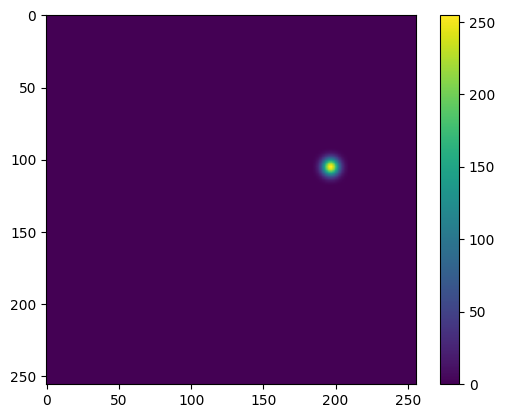

In [46]:
plt.imshow(labels_np[9, :, :, 1])
plt.colorbar()

In [ ]:
os.path.basename(Path(training_image_filenames)

TypeError: expected str, bytes or os.PathLike object, not list

KeyboardInterrupt: 

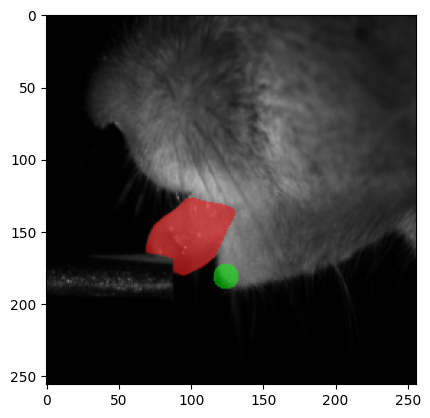

In [8]:
import matplotlib.pyplot as plt
(myfig, myax) = plt.subplots(1,1)
output_folder = "test_images"

i = 0
for img, filename in zip(training_images, training_image_filenames):
    norm_label = labels_np[i, :, :, :].copy()
    norm_label = norm_label.astype(np.float32)
    norm_label[:,:,1] = norm_label[:,:,1] / 255.0
    myax.imshow(plotting.combine_overlay(img / 255,
                                    norm_label,
                                    label_color=[[1, 0, 0], [0, 1, 0]],
                                    label_threshold=0.1))
    myfig.savefig(os.path.join(output_folder, os.path.basename(filename) + '_overlay.png'))
    myax.clear()
    i += 1
    #if i >= 1100:
    #    break

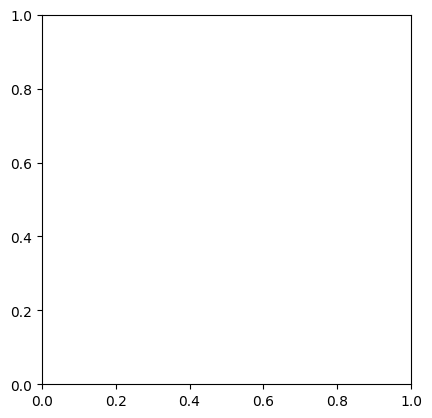

In [9]:
import matplotlib.pyplot as plt
(myfig, myax) = plt.subplots(1,1)
output_folder = "test_images"

from pathlib import Path  # Add this import if not already present

i = 0
for img, filename in zip(training_images, training_image_filenames):
    norm_label = labels_np[i, :, :, :].copy()
    norm_label = norm_label.astype(np.float32)
    norm_label[:,:,1] = norm_label[:,:,1] / 255.0

    # Get experiment folder (grandparent of image file)
    experiment_folder = Path(filename).parents[1].name

    # Build output filename: experiment_imagename_overlay.png
    out_name = f"{experiment_folder}_{Path(filename).stem}_overlay.png"

    myax.imshow(plotting.combine_overlay(img / 255,
                                         norm_label,
                                         label_color=[[1, 0, 0], [0, 1, 0]],
                                         label_threshold=0.1))
    myfig.savefig(os.path.join(output_folder, out_name))
    myax.clear()
    i += 1
    #if i >= 1100:
    #    break